# Gather

In [83]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [84]:
data = pd.read_csv('StudentsPerformance.csv')

# Assess

In [85]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [86]:
datanumeric = data.copy()            #we take a copy of the data so that any modifications don't affect the original dataset

In [87]:
datanumeric

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [88]:
datanumeric.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [89]:
datanumeric = datanumeric.drop('gender', axis=1)
datanumeric = datanumeric.drop('race/ethnicity', axis=1)
datanumeric = datanumeric.drop('parental level of education', axis=1)
datanumeric = datanumeric.drop('lunch', axis=1)
datanumeric = datanumeric.drop('test preparation course', axis=1)       #we will use the students scores only just for simplification

In [90]:
datanumeric

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [91]:
datanumericrd= datanumeric.head(30)              #we will work on a sample only for a better visualization

Dendogram (to know the number of clusters)

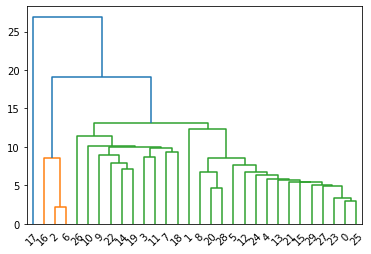

In [92]:
dendrogram = sch.dendrogram(sch.linkage(datanumericrd,"single"))

from the Dendogram, the data should be separated into 3 clusters

# Agglomerative Clustering

In [93]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single')
cluster.fit_predict(datanumericrd)

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

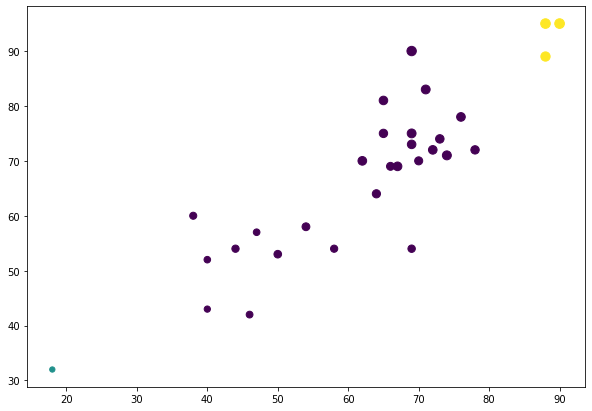

In [94]:
plt.figure(figsize=(10, 7))  
plt.scatter(datanumericrd['math score'], datanumericrd['reading score'],datanumericrd['writing score'], c=cluster.labels_)

# K-Medoids Clustering

In [95]:
Kmedoids_cluster = KMedoids(n_clusters=3, metric="manhattan",init="random")
Kmedoids_cluster.fit_predict(datanumericrd)

array([1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [96]:
Kmedoids_cluster.medoid_indices_

array([22, 23,  6])

In [97]:
Kmedoids_cluster.cluster_centers_

array([[44, 54, 53],
       [69, 73, 73],
       [88, 95, 92]], dtype=int64)

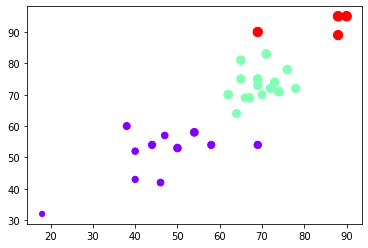

In [98]:
plt.scatter(datanumericrd['math score'], datanumericrd['reading score'],datanumericrd['writing score'], c=Kmedoids_cluster.labels_, cmap='rainbow')